# Import Dataset

In [1]:
import pandas as pd
import sqlite3

# Membuat koneksi ke database SQLite
conn = sqlite3.connect('customer_segmentation.db')

# Load Data to SQL Database

In [2]:
# Load dataset ke dalam DataFrame
data = pd.read_csv('https://raw.githubusercontent.com/imomenujung/SQL-Project/main/Data-Analyst/Customer-Segmentation/online_retail.csv', encoding='ISO-8859-1')

# Impor data ke tabel SQL
data.to_sql('online_retail', conn, if_exists='replace', index=False)

541909

# Check Null and Duplicates Values

The code follows what was done in the previously created project: https://github.com/hoora-mohseni/Online-Retail

In [3]:
# Check for null values
null_check = pd.read_sql("""
SELECT
    SUM(CASE WHEN InvoiceNo IS NULL THEN 1 ELSE 0 END) as NullInvoiceNo,
    SUM(CASE WHEN StockCode IS NULL THEN 1 ELSE 0 END) as NullStockCode,
    SUM(CASE WHEN Description IS NULL THEN 1 ELSE 0 END) as NullDescription,
    SUM(CASE WHEN Quantity IS NULL THEN 1 ELSE 0 END) as NullQuantity,
    SUM(CASE WHEN InvoiceDate IS NULL THEN 1 ELSE 0 END) as NullInvoiceDate,
    SUM(CASE WHEN UnitPrice IS NULL THEN 1 ELSE 0 END) as NullUnitPrice,
    SUM(CASE WHEN CustomerID IS NULL THEN 1 ELSE 0 END) as NullCustomerID,
    SUM(CASE WHEN Country IS NULL THEN 1 ELSE 0 END) as NullCountry
FROM online_retail
""", conn)

print("=== Null Value Check ===")
display(null_check)

# Check for duplicates
duplicate_check = pd.read_sql("""
SELECT
    InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country,
    COUNT(*) as DuplicateCount
FROM online_retail
GROUP BY InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country
HAVING COUNT(*) > 1
""", conn)

print("\n=== Duplicate Check ===")
display(duplicate_check)


=== Null Value Check ===


,NullInvoiceNo,NullStockCode,NullDescription,NullQuantity,NullInvoiceDate,NullUnitPrice,NullCustomerID,NullCountry
0,0,0,1454,0,0,0,135080,0



=== Duplicate Check ===


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DuplicateCount
0,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,2
1,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom,2
2,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom,2
3,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom,2
4,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-12-01 11:49:00,1.65,17920.0,United Kingdom,2
...,...,...,...,...,...,...,...,...,...
4874,C572226,85066,CREAM SWEETHEART MINI CHEST,-1,2011-10-21 13:58:00,12.75,15321.0,United Kingdom,2
4875,C574095,22326,ROUND SNACK BOXES SET OF4 WOODLAND,-1,2011-11-03 09:54:00,2.95,12674.0,France,2
4876,C574510,22360,GLASS JAR ENGLISH CONFECTIONERY,-1,2011-11-04 13:25:00,2.95,15110.0,United Kingdom,2
4877,C575940,23309,SET OF 60 I LOVE LONDON CAKE CASES,-24,2011-11-13 11:38:00,0.55,17838.0,United Kingdom,2


# Data Cleaned

In [4]:
queries = {
"Menghapus baris dengan nilai yang hilang" : """
DELETE FROM online_retail WHERE CustomerID IS NULL""",
"Menghapus duplikasi" : '''
DELETE FROM online_retail
WHERE rowid NOT IN (
    SELECT MIN(rowid)
    FROM online_retail
    GROUP BY InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country
)'''
}

# Execute queries
for key, query in queries.items():
    conn.execute(query)
    print(f"=== {key} - Rows Affected: {conn.total_changes} ===") # Print number of rows affected

# Fetch data after modifications
results = {
    "Data setelah penghapusan baris dengan nilai hilang": pd.read_sql("SELECT * FROM online_retail", conn),
    "Data setelah penghapusan duplikat": pd.read_sql("SELECT * FROM online_retail", conn)
}

# Display results
for key, df in results.items():
    print(f"=== {key} ===")
    display(df.head())

=== Menghapus baris dengan nilai yang hilang - Rows Affected: 676989 ===
=== Menghapus duplikasi - Rows Affected: 682214 ===
=== Data setelah penghapusan baris dengan nilai hilang ===


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


=== Data setelah penghapusan duplikat ===


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Recheck Null and Duplicate Values
The code follows what was done in the previously created project: https://github.com/hoora-mohseni/Online-Retail

In [5]:
# Check for null values
null_check = pd.read_sql("""
SELECT
    SUM(CASE WHEN InvoiceNo IS NULL THEN 1 ELSE 0 END) as NullInvoiceNo,
    SUM(CASE WHEN StockCode IS NULL THEN 1 ELSE 0 END) as NullStockCode,
    SUM(CASE WHEN Description IS NULL THEN 1 ELSE 0 END) as NullDescription,
    SUM(CASE WHEN Quantity IS NULL THEN 1 ELSE 0 END) as NullQuantity,
    SUM(CASE WHEN InvoiceDate IS NULL THEN 1 ELSE 0 END) as NullInvoiceDate,
    SUM(CASE WHEN UnitPrice IS NULL THEN 1 ELSE 0 END) as NullUnitPrice,
    SUM(CASE WHEN CustomerID IS NULL THEN 1 ELSE 0 END) as NullCustomerID,
    SUM(CASE WHEN Country IS NULL THEN 1 ELSE 0 END) as NullCountry
FROM online_retail
""", conn)

print("=== Null Value Check ===")
display(null_check)

# Check for duplicates
duplicate_check = pd.read_sql("""
SELECT
    InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country,
    COUNT(*) as DuplicateCount
FROM online_retail
GROUP BY InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country
HAVING COUNT(*) > 1
""", conn)

print("\n=== Duplicate Check ===")
display(duplicate_check)


=== Null Value Check ===


,NullInvoiceNo,NullStockCode,NullDescription,NullQuantity,NullInvoiceDate,NullUnitPrice,NullCustomerID,NullCountry
0,0,0,0,0,0,0,0,0



=== Duplicate Check ===


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DuplicateCount


# Calculate Recency Frequency and Monetary
Referring to what Abdullah Orzan did
in his publication titled Data-Driven Customer Segmentation: RFM and CLTV Analysis Using Python at the following link: https://medium.com/@abdullahorzan/data-driven-customer-segmentation-rfm-and-cltv-analysis-using-python-4238b11bd740

In [6]:
# Calculate Recency, Frequency, and Monetary
rfm_query = '''
WITH recency_table AS (
    SELECT
        CustomerID,
        (julianday('now') - julianday(MAX(InvoiceDate))) AS recency
    FROM online_retail
    GROUP BY CustomerID
),
frequency_table AS (
    SELECT
        CustomerID,
        COUNT(DISTINCT InvoiceNo) AS frequency
    FROM online_retail
    GROUP BY CustomerID
),
monetary_table AS (
    SELECT
        CustomerID,
        SUM(Quantity * UnitPrice) AS monetary
    FROM online_retail
    GROUP BY CustomerID
)
SELECT
    r.CustomerID,
    r.recency,
    f.frequency,
    m.monetary
FROM recency_table r
JOIN frequency_table f ON r.CustomerID = f.CustomerID
JOIN monetary_table m ON r.CustomerID = m.CustomerID
'''

rfm = pd.read_sql_query(rfm_query, conn)

rfm.head()

,CustomerID,recency,frequency,monetary
0,12346.0,4938.877220,2,0.00
1,12347.0,4615.644581,7,4310.00
2,12348.0,4688.754998,4,1797.24
3,12349.0,4631.895276,1,1757.55
4,12350.0,4923.638331,1,334.40


# Visualization with Scatter Plot

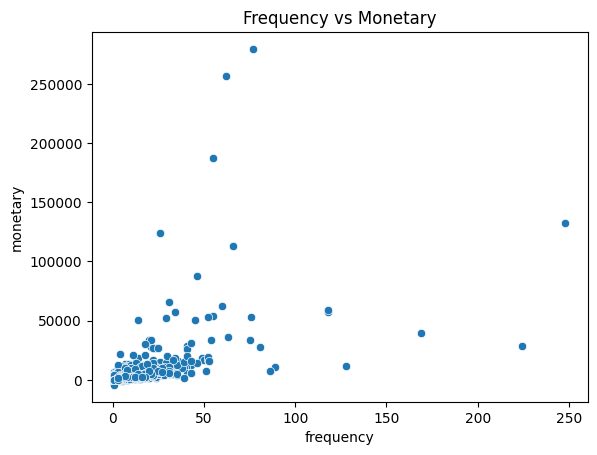

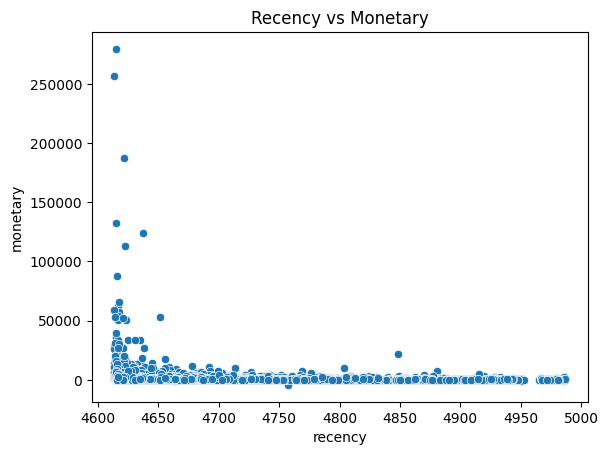

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot Frequency vs Monetary
sns.scatterplot(data=rfm, x='frequency', y='monetary')
plt.title('Frequency vs Monetary')
plt.show()

# Scatter plot Recency vs Monetary
sns.scatterplot(data=rfm, x='recency', y='monetary')
plt.title('Recency vs Monetary')
plt.show()


# Calculate RFM Score

In [8]:
rfm["monetary_score"] = pd.qcut(rfm["monetary"], 5, labels=[1, 2, 3, 4, 5])
rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm["recency_score"] = pd.qcut(rfm["recency"], 5, labels=[5, 4, 3, 2, 1])

# Create final RFM score
rfm["RFM_SCORE"] = (rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str))
rfm.head()

,CustomerID,recency,frequency,monetary,monetary_score,frequency_score,recency_score,RFM_SCORE
0,12346.0,4938.877220,2,0.00,1,2,1,12
1,12347.0,4615.644581,7,4310.00,5,4,5,54
2,12348.0,4688.754998,4,1797.24,4,3,2,23
3,12349.0,4631.895276,1,1757.55,4,1,4,41
4,12350.0,4923.638331,1,334.40,2,1,1,11


# Segmentation

In [9]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)
rfm.head()

,CustomerID,recency,frequency,monetary,monetary_score,frequency_score,recency_score,RFM_SCORE,segment
0,12346.0,4938.877220,2,0.00,1,2,1,12,hibernating
1,12347.0,4615.644581,7,4310.00,5,4,5,54,champions
2,12348.0,4688.754998,4,1797.24,4,3,2,23,at_Risk
3,12349.0,4631.895276,1,1757.55,4,1,4,41,promising
4,12350.0,4923.638331,1,334.40,2,1,1,11,hibernating


In [10]:
# prompt: buatkan visualisasi untuk rfm

import plotly.express as px

# Visualization of Customer Segment Distribution
fig_segment_dist = px.histogram(rfm, x='segment', title='Customer Segment Distribution')
fig_segment_dist.show()

# RFM Visualization with scatter plot 3D
fig_scatter_3d = px.scatter_3d(rfm, x='recency', y='frequency', z='monetary', color='segment',
                               title='Visualisasi 3D RFM',
                               labels={'recency': 'recency', 'frequency': 'frequency', 'monetary': 'monetary'})
fig_scatter_3d.show()

# RFM visualization with heatmap
rfm_heatmap = rfm.pivot_table(index='recency_score', columns='frequency_score', values='monetary', aggfunc='mean')

# Get the correct F_Score labels from the columns of the heatmap
x_labels = rfm_heatmap.columns.tolist()

fig_heatmap = px.imshow(rfm_heatmap,
                        labels=dict(x="frequency_score", y="recency_score", color="Average Monetary Value"),
                        x=x_labels,  # Use the extracted labels
                        y=['5', '4', '3', '2', '1'],
                        title='RFM Heatmap')
fig_heatmap.show()